In [90]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import datetime
import statsmodels.api as sm

from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

In [30]:
df_calendar = pd.read_table('file.tsv',sep=',')
df_calendar.head()

,Домашняя команда,Гостевая команда,Дата,Стадион,Город,home_score,guest_score
0,Кристал,Пэлас,05.08.2022,Селхерст Парк,Лондон,0,2
1,Фулхэм,Ливерпуль,06.08.2022,Крэйвен Коттедж,Лондон,2,2
2,Борнмут,Астон,06.08.2022,Виталити - Дин Корт,Борнмут,2,0
3,Лидс,Юнайтед,06.08.2022,Элланд Роуд,Лидс,2,1
4,Ньюкасл,Юнайтед,06.08.2022,Сент-Джеймс Парк,Ньюкасл-апон-Тайн,2,0


In [31]:
df_calendar['Город'].unique()

array(['Лондон', 'Борнмут', 'Лидс', 'Ньюкасл-апон-Тайн', 'Ливерпуль',
       'Лестер', 'Манчестер', 'Бирмингем', 'Брайтон энд Хоув',
       'Саутгемптон', 'Вулверхэмптон', 'Брентфорд', 'Ноттингем',
       'Уотфорд', 'Бернли', 'Норидж'], dtype=object)

In [32]:
df_weather = pd.read_table('weather.tsv')
df_weather['Город'].unique()

array(['Борнмут', 'Лидс', 'Ньюкасл-апон-Тайн', 'Лестер', 'Брайтон',
       'Саутгемптон', 'Уольверхэмптон', 'Брэдфорд', 'Ноттингем',
       'Уотфорд', 'Бернли', 'Норидж', 'Ливерпуль', 'Манчестер', 'Лондон',
       'Бирмингем'], dtype=object)

In [33]:
df_weather.loc[(df_weather['Город'] =='Брэдфорд'), 'Город'] = 'Брентфорд'
df_weather.loc[(df_weather['Город'] =='Уольверхэмптон'), 'Город'] = 'Вулверхэмптон'
df_weather.loc[(df_weather['Город'] =='Брайтон'), 'Город'] = 'Брайтон энд Хоув'
df_weather['Город'].unique()

array(['Борнмут', 'Лидс', 'Ньюкасл-апон-Тайн', 'Лестер',
       'Брайтон энд Хоув', 'Саутгемптон', 'Вулверхэмптон', 'Брентфорд',
       'Ноттингем', 'Уотфорд', 'Бернли', 'Норидж', 'Ливерпуль',
       'Манчестер', 'Лондон', 'Бирмингем'], dtype=object)

In [51]:
df_calendar['Месяц'] = df_calendar['Дата'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y').strftime('%m'))
df_calendar['Месяц'] = df_calendar['Месяц'].astype(int)

In [65]:
data = pd.merge(df_calendar, df_weather, on = ['Месяц', 'Город'])
data['Дневная температура'] = data['Дневная температура'].str.replace('°C', '')
data['Осадки'] = data['Осадки'].str.replace('мм)', '').str.replace('(', '')


In [69]:
scores = data[['home_score', 'guest_score', 'Дневная температура', 'Дождь', 'Осадки']]
corr_matrix = scores.corr()
print(corr_matrix)


                     home_score  guest_score  Дневная температура     Дождь  \
home_score             1.000000    -0.136649             0.097954  0.175414   
guest_score           -0.136649     1.000000            -0.020499 -0.049175   
Дневная температура    0.097954    -0.020499             1.000000  0.086736   
Дождь                  0.175414    -0.049175             0.086736  1.000000   
Осадки                 0.187232    -0.083980             0.142399  0.706890   

                       Осадки  
home_score           0.187232  
guest_score         -0.083980  
Дневная температура  0.142399  
Дождь                0.706890  
Осадки               1.000000  


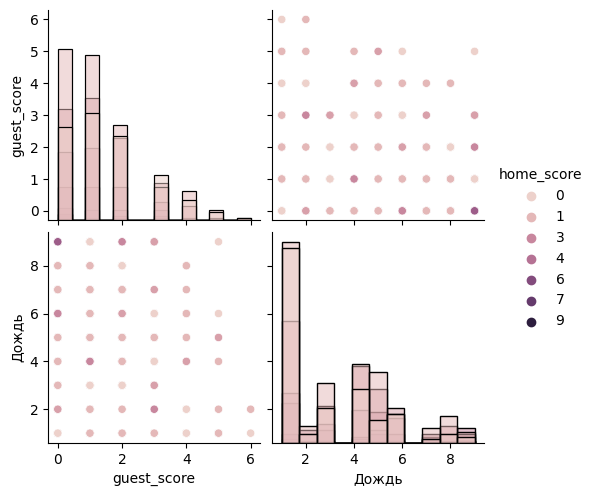

In [70]:
sns.pairplot(scores, hue='home_score',diag_kind="hist")

In [72]:
scores.head()

,home_score,guest_score,Дневная температура,Дождь,Осадки
0,0,2,+21.5,3,51.1
1,2,2,+21.5,3,51.1
2,4,1,+21.5,3,51.1
3,0,2,+21.5,3,51.1
4,4,2,+21.5,3,51.1


__Нулевая гипотеза: В результатах матчей существуют различия в зависимости от погодных условий.__
$$
\begin{aligned}
& H_0: \mu_{cold} \neq \mu_{hot} \\
& H_1: \mu_{cold} = \mu_{hot}
\end{aligned}
$$

In [85]:
data['Дневная температура'] = data['Дневная температура'].str.replace('+', '')
hot = data[data['Дневная температура'].astype(float) > data['Дневная температура'].astype(float).mean()]
cold = data[data['Дневная температура'].astype(float) <= data['Дневная температура'].astype(float).mean()]

# Проводим t-тест для групп матчей c разной температурой
# Уровень значимости: 0.05
alpha = 0.05
t_stat, p_val = ttest_ind(hot['home_score'], cold['home_score'])

print('t-статистика:', t_stat)
print('значение p:', p_val)

if p_val < alpha:
    print('Нулевая гипотеза не отвергается: в результатах матчей существуют различия в зависимости от погодных условий')
else:
    print('Нулевая гипотеза отвергается: в результатах матчей нет существенных различий в зависимости от погодных условий')



t-статистика: 1.7894360648774648
значение p: 0.07394374292824933
Нулевая гипотеза отвергается: в результатах матчей нет существенных различий в зависимости от погодных условий


In [96]:
scores['Дневная_температура'] = scores['Дневная температура']
regression = ols('home_score ~ Дневная_температура + Дождь + Осадки', data=scores).fit()
print(regression.summary())


                            OLS Regression Results                            
Dep. Variable:             home_score   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.228
Date:                Wed, 14 Jun 2023   Prob (F-statistic):             0.0475
Time:                        17:40:00   Log-Likelihood:                -1214.8
No. Observations:                 760   AIC:                             2744.
Df Residuals:                     603   BIC:                             3471.
Df Model:                         156                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/var/folders/zs/qsj7l81d767f5zkrl6sbh5bh0000gn/T/ipykernel_358/1864986943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['Дневная_температура'] = scores['Дневная температура']


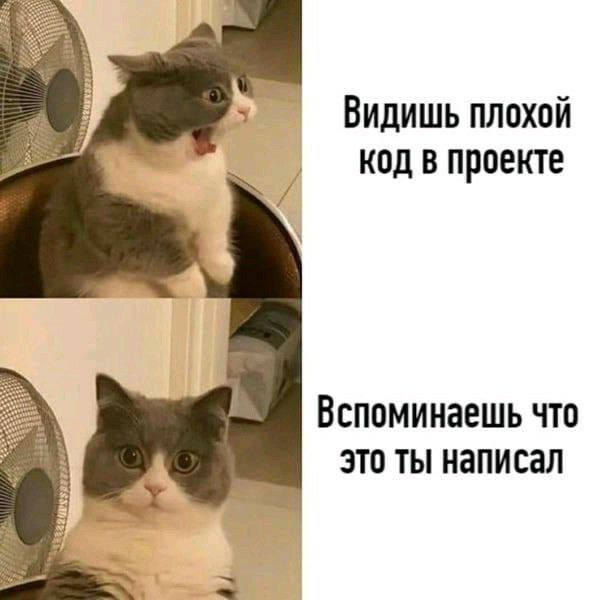